## Problem set 2

### Problem 0 

-2 points for every missing green OK sign. If you don't run the cell below, that's -14 points.

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.5

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1

One of the datasets we will be working with this semester is the kaggle house price dataset. The goal of this problem set is to use this dataset to practice dataframe manipulations and perform EDA.

Carefully read the description of the dataset which is located in the `data` folder. This is a very well documented dataset. Whenever you work with a dataset, it is highly recommended that you prepare a similar description if it is not readily available. Specific things to note:

- each feature is described in full detail,
- the meaning of continuous features is explained and their unit is provided (e.g., lot size is measured in square feet),
- each category in a categorical or ordinal feature is spelled out and explained.

### Problem 1a: Read in the data (5 points)

The kaggle house price dataset is located in the `data` folder. 

First, read the data into a pandas data frame and display the data frame below. You might encounter error messages and other issues along the way. Please diagnose and resolve them. 


In [103]:
# your code here 
import pandas as pd
# df = pd.read_excel('/Users/justinli/Desktop/ps2-eda-ZhiruiLi1-main/data/train.xlsx') # you need to specify the sheet name
df = pd.read_excel('/Users/justinli/Desktop/ps2-eda-ZhiruiLi1-main/data/train.xlsx', sheet_name = "data")
print(df.head)

<bound method NDFrame.head of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0             60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1             20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2             60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3             70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4             60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...          ...      ...          ...      ...    ...   ...      ... 

### Problem 1b: dataframe filtering

Answer the following data filtering related questions. 

Please make it easy for the TAs to grade your solution so print no more and no less than the necessary info. For example, if we ask how many columns there are in the dataset, print out that one number instead of the full shape of the data frame.

**Q1** When you buy a house, a surprising amount of time is spent assessing the basement. List the names of the basement-related features! How many basement-related features are there? (2 points)

In [15]:
# your code here 
print(df.columns)
basement_features = []
for c in df.columns:
    # print(c.find("Bsmt"))
    if c.find("Bsmt") != -1: # if "Bsmt" is present; .find() returns the lowest index 
        basement_features.append(c)
print(basement_features)
print(len(basement_features))

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

The basement-related features are: ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'] 

There are total 11 basement-related features. 

**Q2** How many houses have an excellent overall quality? (1 point)

In [18]:
# your code here
print(set(df['OverallQual'])) # {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
df[df['OverallQual'] == 9].shape[0] # 9 represents the excellent quality 

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


43

There are 43 houses have an excellent (9) overall quality. 

**Q3** How many houses were built on or before the year 2000? (1 point)

In [27]:
# your code here 
df[df['YearBuilt'] <= 2000]['YearBuilt'].shape[0]

1096

There are 1096 houses built on or before the year 2000. 

**Q4** How many houses have a pool and central airconditioning? (2 points)

In [28]:
# your code here 
df[(df['CentralAir'] == 'Y') & (df['PoolQC'].notna())].shape[0] # .notna() returns True if it is not NA 

7

There are 7 houses that have a pool and a central airconditioning. 

### Problem 2a: EDA

Answer the following EDA related questions. 

The sequence of questions here are typical things to ask when you perform EDA on a new dataset. First you always want to know how many data points and features you have, and whether they are continuous or categorical. You should then take a closer look at the target variable. We will study the properties of the features and the relationships between the features and the target variable in 2b.

**Q1** How many rows and columns do we have in the dataframe? (2 point)

In [29]:
# your code here 
df.shape

(1460, 80)

There are 1460 rows and 80 columns. 

**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column. (2 points)

In [58]:
# your code here
# pd.set_option('display.max_rows', None)
print(df.dtypes.to_string())


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


**Q3** The ML target variable in this dataset is the sale price. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature. (2 points)

In [62]:
# your code here
print(df['SalePrice'].describe())
print(df['SalePrice'].value_counts())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64


The column variable 'SalePrice' is continuous becuase it is of data type 'int64'. 

**Q4** Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data. (4 points)

38


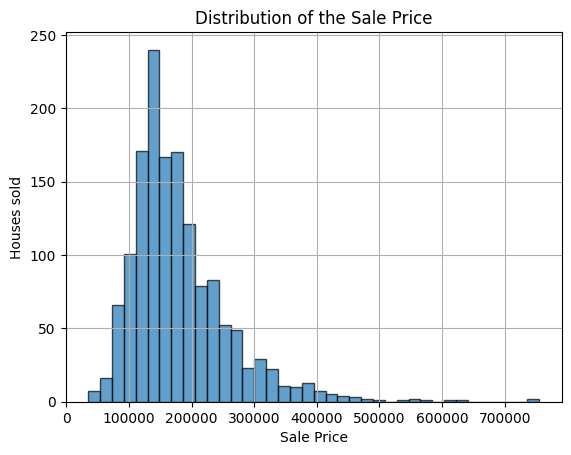

In [68]:
# your code here 
import matplotlib.pyplot as plt
import math 


value = math.floor(math.sqrt(len(df['SalePrice']))) # a good bin value 
print(value)
df['SalePrice'].hist(bins=value, edgecolor='k', alpha=0.7)
plt.title('Distribution of the Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Houses sold')
plt.show()

### Problem 2b: visualization (15 points)

Find one continuous, one ordinal, and one categorical feature that strongly correlates with the sale price. Create figures that illustrate your selected features and the sale price.

Don't forget to add axis labels and titles, and find apropriate arguments. Write figure captions to explain what the figure shows.

We will cover techniques in a week or two to quantitatively assess how strongly each feature correlates with the target variable. For now, we do a qualitative/visual assessment.

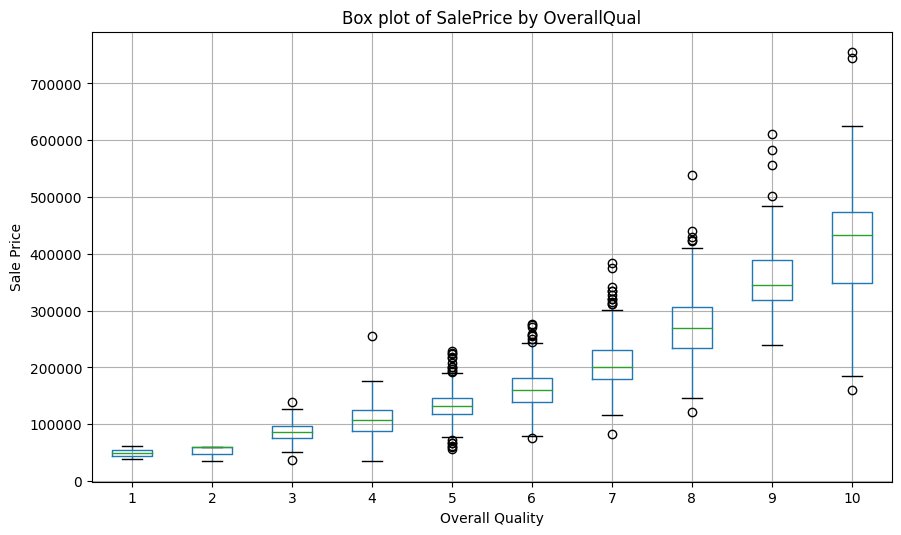

In [88]:
# your code here 
df.boxplot(column=['SalePrice'], by='OverallQual', figsize=(10, 6))
plt.title('Box plot of SalePrice by OverallQual')
plt.suptitle('')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

Overall Quality is an ordinal categorical variable, where 1 represents very poor and 10 represents very excellent. We can clearly see a positive correlation between OverallQual and SalePrice: a higher overall quality will lead to a higher sale price. 

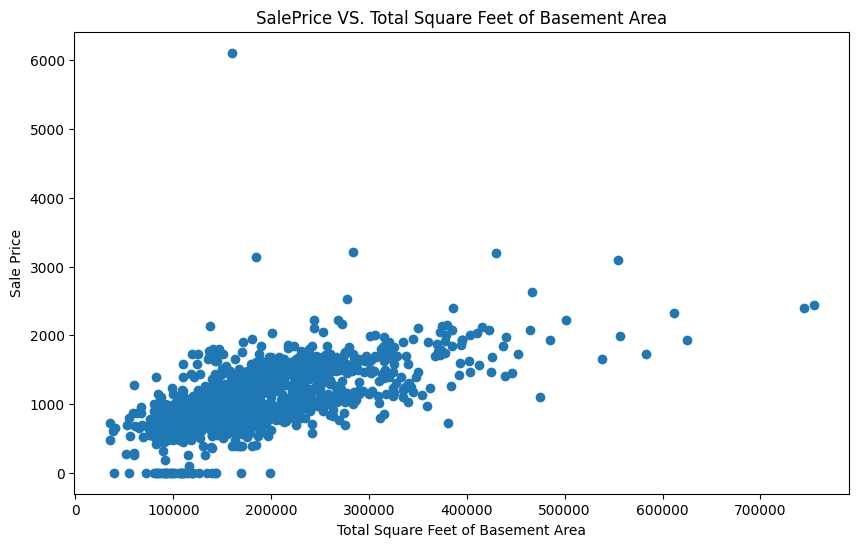

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(df['SalePrice'], df['TotalBsmtSF'])
plt.title('SalePrice VS. Total Square Feet of Basement Area')
plt.suptitle('')
plt.xlabel('Total Square Feet of Basement Area')
plt.ylabel('Sale Price')
plt.show()

Total Square Feet of Basement Area is a continuous variable and we can also see a positive correlation between it and Sale Price. When Total Square Feet of Basement Area is higher, Sale Price tends to be higher as well. 

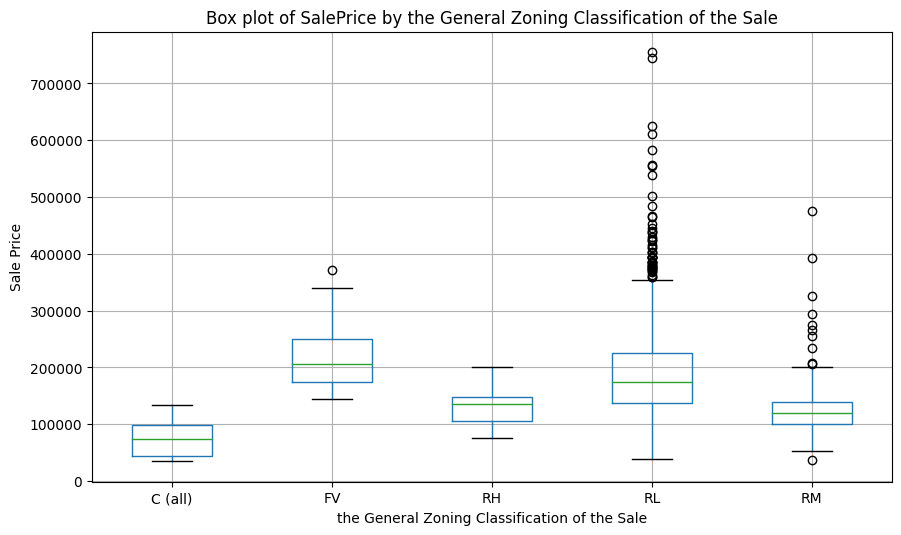

In [101]:
df.boxplot(column=['SalePrice'], by='MSZoning', figsize=(10, 6))
plt.title('Box plot of SalePrice by the General Zoning Classification of the Sale')
plt.suptitle('')
plt.xlabel('the General Zoning Classification of the Sale')
plt.ylabel('Sale Price')
plt.show()

the General Zoning Classification of the Sale ("MSZoning") is an nominal categorical variable. Where C represents Commerical, FV represents Floating Village Residential, RH represents Residential High Density, RL represents Residential Low Density, and RM represents Residential Medium Density. There is a slight correlation betwen sale price and the general zoning classification of the sale. For example, types of FV, RL tend to have a higher sale price than type C. Type RL and RM tend to have a lot of outliers compared to the three other types. 